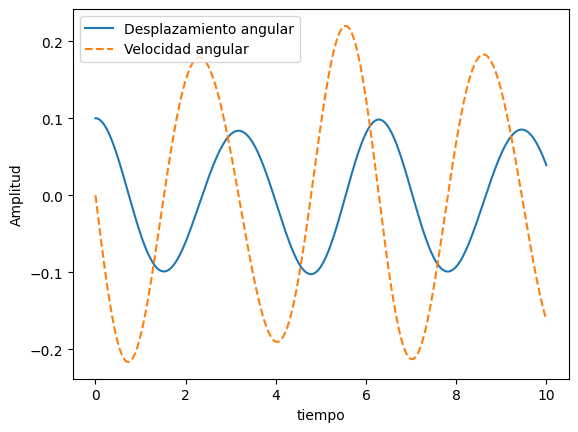

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#x - desplazamiento angular
#v - velocidad angular

def AB(h,dx,dv,x0,v0,t0,tf):
    N = int((tf-t0)/h)
    t_v = np.linspace(t0,tf,N+1)
    x_v = np.zeros(N+1)
    v_v = np.zeros(N+1)
    x_v[0] = x0
    v_v[0] = v0
    for i in range(3):
        x_v[i+1] = x_v[i] + h*dx(t_v[i],x_v[i],v_v[i])
        v_v[i+1] = v_v[i] + h*dv(t_v[i],x_v[i],v_v[i])
        for n in range(3,N):
            x_pred = x_v[n] + (h/12)*(23*dx(t_v[n],x_v[n],v_v[n])-16*dx(t_v[n-1],x_v[n-1],v_v[n-1])+5*dx(t_v[n-2],x_v[n-2],v_v[n-2]))
            v_pred = v_v[n] + (h/12)*(23*dv(t_v[n],x_v[n],v_v[n])-16*dv(t_v[n-1],x_v[n-1],v_v[n-1])+5*dv(t_v[n-2],x_v[n-2],v_v[n-2]))
            x_v[n+1] = x_v[n] + (h/24)*(9*dx(t_v[n+1],x_pred,v_pred)+19*dx(t_v[n],x_v[n],v_v[n])-5*dx(t_v[n-1],x_v[n-1],v_v[n-1])+dx(t_v[n-2],x_v[i-2],v_v[i-2]))
            v_v[n+1] = v_v[n] + (h/24)*(9*dv(t_v[n+1],x_pred,v_pred)+19*dv(t_v[n],x_v[n],v_v[n])-5*dv(t_v[n-1],x_v[n-1],v_v[n-1])+dv(t_v[n-2],x_v[i-2],v_v[i-2]))
    return t_v,x_v,v_v



    

    
#DATOS
m = 2
L = 1
g = 9.8
f = 1
w = 2
b = 0.1
h = 0.01
x0 = 0.1
v0 = 0
t0 = 0
tf = 10

dx = lambda t,x,v: v
dv = lambda t,x,v: f/(m*L)*(np.cos(w*t)) - (b/(m*L))*v - ((g/L))*x

t_value ,x_value ,v_value  = AB(h,dx,dv,x0,v0,t0,tf)
plt.plot(t_value,x_value,label = 'Desplazamiento angular')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.plot(t_value,v_value,linestyle = '--', label = 'Velocidad angular')
plt.legend()



